In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA
import numpy as np 
import GPy
import torch
from __future__ import absolute_import, division, print_function
import torch
from torch.distributions import constraints
from torch.nn import Parameter
import pyro
from pyro.contrib.gp.util import Parameterized
import pyro.distributions as dist
import pyro.infer as infer
import pyro.optim as optim
from pyro.params import param_with_module_name
import pyro.contrib.gp as gp
import pyro.distributions as dist
import matplotlib.pyplot as plt
pyro.clear_param_store()
import tensorflow as tf
import numpy as np 
import pandas as pd
import numpy
import math
import cProfile
import time
import GPy
import numpy as np
from matplotlib import pyplot as plt

import statsmodels.api as sm
import sympy as sp
#import pymc
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
from scipy.special import gamma
from GPy.core.parameterization.variational import NormalPosterior, NormalPrior

from sympy.interactive import printing
import pyro.contrib.gp.models.vsgp as vsgp
from GPy.util.linalg import pdinv
from pyro.infer.mcmc.hmc import HMC
from pyro.infer.mcmc import MCMC
from matplotlib import pyplot
pyro.clear_param_store()
import time
torch.manual_seed(12)
pyro.set_rng_seed(101)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA
import numpy as np 
import gpflow

In [2]:
def initialize_latent(input_dim, Y):
    Xr = np.asfortranarray(np.random.normal(0, 1, (Y.shape[0], input_dim)))
    p = GPy.util.pca.PCA(Y)
    PC = p.project(Y, min(input_dim, Y.shape[1]))
    Xr[:PC.shape[0], :PC.shape[1]] = PC
    var = .1*p.fracs[:input_dim]
    Xr -= Xr.mean(0)
    Xr /= Xr.std(0)
    return Xr, var/var.max()

In [3]:
X = np.load('datasets/X.npy')
Y = np.load('datasets/Y.npy')
N = X.shape[0]
sample_mean = np.mean(X[:N,:])
sample_std = np.std(X[:N,:])
sample_norm = (X[:N,:] - sample_mean)/sample_std # normalisation
X_flat = np.array(sample_norm).reshape((2062, 64*64))

In [4]:
clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(100, 100, 100, 100), random_state=1)

In [5]:
M = 100# number of inducing pts
Q=5
X_mean = gpflow.models.PCA_reduce(X_flat, Q) # Initialise via PCA
Z = np.random.permutation(X_mean.copy())[:M]
Xu = torch.tensor(Z).float()
Xr, fracs = initialize_latent(Q, X_flat)
X_loc = torch.tensor(Xr).float()
fracs = torch.tensor(1./fracs).float()
kernel = gp.kernels.RBF(input_dim=Q, lengthscale=fracs)
gpmodel = gp.models.SparseGPRegression(X_loc, torch.tensor(X_flat.T).float(), kernel, Xu, noise=torch.tensor(0.2953218115879997),approx='DTC')
gplvm = gp.models.GPLVM(gpmodel)

CPU+SystemTime:16764.65625 seconds
Code Run Time:15545.719560146332 seconds


Text(0.5,1,'Convergence of SVI')

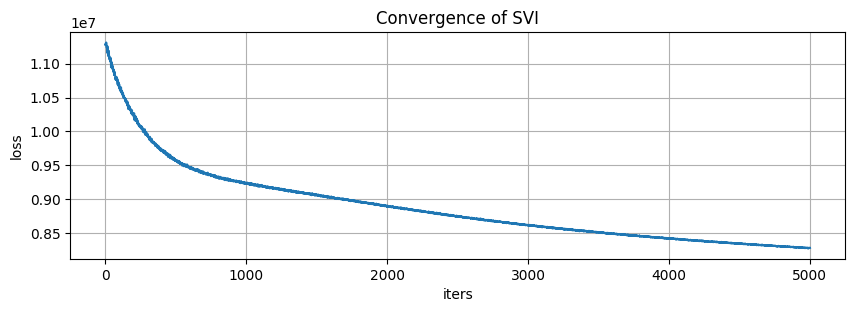

In [6]:
i=list(range(1,5001))
st = time.process_time()
st2 = time.time()
losses = gplvm.optimize(num_steps=5000)  # doctest: +SKIP
end =  time.process_time()
end2 = time.time()
print(str('CPU+SystemTime:')+str(end-st)+' '+str('seconds'))
print(str('Code Run Time:')+str(end2-st2)+' '+str('seconds'))
pyplot.figure(figsize=(10,3), dpi=100).set_facecolor('white')
pyplot.plot(i,losses)
pyplot.xlabel('iters')
pyplot.ylabel('loss')
pyplot.grid()
pyplot.title('Convergence of SVI')

In [7]:
X_train, X_test, y_train, y_test = train_test_split(gplvm.get_param('X_loc').detach().numpy(), Y, test_size=0.3, random_state=42)

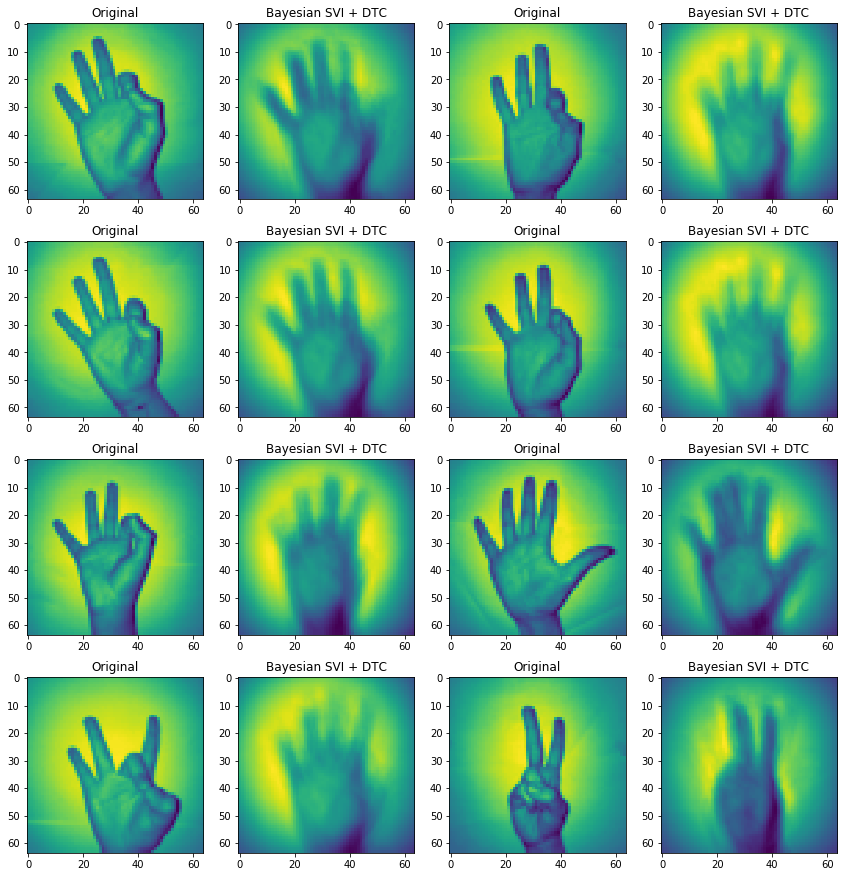

In [8]:
X_back,X_var = gplvm.base_model.forward(Xnew=gplvm.get_param('X_loc'))
X_back = X_back.detach().numpy().T
f = plt.figure()
f.add_subplot(4,4, 1)
plt.title("Original")
plt.imshow(X_flat[10].reshape((64,64)))
f.add_subplot(4,4, 2)
plt.title("Bayesian SVI + DTC")
plt.imshow(X_back[10].reshape((64,64)))
f.add_subplot(4,4, 3)
plt.title("Original")
plt.imshow(X_flat[1].reshape((64,64)))
f.add_subplot(4,4, 4)
plt.title("Bayesian SVI + DTC")
plt.imshow(X_back[1].reshape((64,64)))
f.add_subplot(4,4, 5)
plt.title("Original")
plt.imshow(X_flat[2].reshape((64,64)))
f.add_subplot(4,4, 6)
plt.title("Bayesian SVI + DTC")
plt.imshow(X_back[2].reshape((64,64)))
plt.subplots_adjust(bottom=0.1, right=2, top=3)
f.add_subplot(4,4, 7)
plt.title("Original")
plt.imshow(X_flat[3].reshape((64,64)))
f.add_subplot(4,4, 8)
plt.title("Bayesian SVI + DTC")
plt.imshow(X_back[3].reshape((64,64)))
plt.subplots_adjust(bottom=0.1, right=2, top=3)
f.add_subplot(4,4, 9)
plt.title("Original")
plt.imshow(X_flat[42].reshape((64,64)))
f.add_subplot(4,4, 10)
plt.title("Bayesian SVI + DTC")
plt.imshow(X_back[42].reshape((64,64)))
f.add_subplot(4,4, 11)
plt.title("Original")
plt.imshow(X_flat[2005].reshape((64,64)))
f.add_subplot(4,4, 12)
plt.title("Bayesian SVI + DTC")
plt.imshow(X_back[2005].reshape((64,64)))

f.add_subplot(4,4, 13)
plt.title("Original")
plt.imshow(X_flat[1115].reshape((64,64)))
f.add_subplot(4,4, 14)
plt.title("Bayesian SVI + DTC")
plt.imshow(X_back[1115].reshape((64,64)))

f.add_subplot(4,4, 15)
plt.title("Original")
plt.imshow(X_flat[1825].reshape((64,64)))
f.add_subplot(4,4, 16)
plt.title("Bayesian SVI + DTC")
plt.imshow(X_back[1825].reshape((64,64)))
plt.subplots_adjust(bottom=0.1, right=2, top=3)

In [9]:
clf.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100, 100, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [10]:
y_hat_reduced = clf.predict(X_test)

In [11]:
 print("accuracy: " + str(accuracy_score(y_test, y_hat_reduced)))

accuracy: 0.39095315024232635


In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [13]:
names = ["Nearest Neighbors", "Gaussian Process",
         "Decision Tree", "Random Forest", "AdaBoost",
         "Naive Bayes", "QDA","Linear SVC"]

In [14]:
classifiers = [
    KNeighborsClassifier(3),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1,random_state=42),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    SVC(kernel="linear", C=0.025)]

In [15]:
classifiers[0].fit(X_train, y_train)
score = classifiers[0].score(X_test, y_test)
print(names[0]+':'+str(score))

Nearest Neighbors:0.38287560581583197


In [16]:
parameters = [
              {'C': [1, 10, 100], 'kernel': ['linear']},
              {'C': [1, 10, 100], 'gamma': [0.1,0.001, 0.0001], 'kernel': ['rbf','sigmoid','poly']},
             ]

In [17]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

In [18]:
model = svm.SVC()
clf3 = GridSearchCV(model, parameters)

In [19]:
unique_rows = np.unique(y_train, axis=0)
i=0
d={}
for i in range(len(unique_rows)):
    d[str(unique_rows[i])]=i

In [20]:
temp_train=[]
for i in y_train:
    temp_train.append(d[str(i)])

In [21]:
clf3.fit(X_train, np.array(temp_train))

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'C': [1, 10, 100], 'kernel': ['linear']}, {'C': [1, 10, 100], 'gamma': [0.1, 0.001, 0.0001], 'kernel': ['rbf', 'sigmoid', 'poly']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [22]:
temp_test=[]
unique_rows = np.unique(y_test, axis=0)
i=0
d={}
for i in range(len(unique_rows)):
    d[str(unique_rows[i])]=i
for i in y_test:
    temp_test.append(d[str(i)])

In [23]:
y_hat_reduced = clf3.predict(X_test)

In [24]:
print("accuracy: " + str(accuracy_score(np.array(temp_test), y_hat_reduced)))

accuracy: 0.5137318255250404


In [25]:
import pickle
model={}
model[0]=gplvm
pickle.dump(model, open( "savefit-DTC100Latent5.p", "wb" ) )

In [26]:
classifiers[1].fit(X_train, np.array(temp_train))
score = classifiers[1].score(X_test, np.array(temp_test))
print(names[1]+':'+str(score))

Gaussian Process:0.4894991922455573


In [27]:
classifiers[2].fit(X_train, np.array(temp_train))
score = classifiers[2].score(X_test, np.array(temp_test))
print(names[2]+':'+str(score))

Decision Tree:0.34894991922455576


In [28]:
classifiers[3].fit(X_train, np.array(temp_train))
score = classifiers[3].score(X_test, np.array(temp_test))
print(names[3]+':'+str(score))

Random Forest:0.38126009693053314


In [29]:
classifiers[4].fit(X_train, np.array(temp_train))
score = classifiers[4].score(X_test, np.array(temp_test))
print(names[4]+':'+str(score))

AdaBoost:0.31179321486268174


In [30]:
classifiers[5].fit(X_train, np.array(temp_train))
score = classifiers[5].score(X_test, np.array(temp_test))
print(names[5]+':'+str(score))

Naive Bayes:0.407108239095315


In [31]:
classifiers[6].fit(X_train, np.array(temp_train))
score = classifiers[6].score(X_test, np.array(temp_test))
print(names[6]+':'+str(score))

QDA:0.4378029079159935


In [32]:
classifiers[7].fit(X_train, np.array(temp_train))
score = classifiers[7].score(X_test, np.array(temp_test))
print(names[7]+':'+str(score))

Linear SVC:0.4168012924071082


 /home/aneeqr/.local/lib/python3.6/site-packages/matplotlib/__init__.py:1867: MatplotlibDeprecationWarning:The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0


Text(0.5,1,'DTC ARD Contribution')

 /home/aneeqr/.local/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


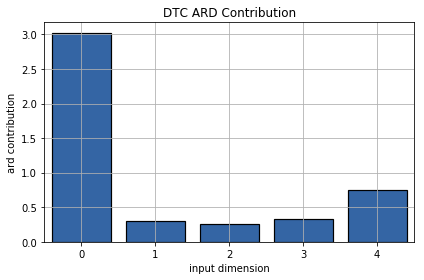

In [33]:
active = gplvm.base_model.kernel.active_dims
input_dim = gplvm.base_model.kernel.input_dim
Var = gplvm.base_model.kernel.get_param('variance').detach().numpy()
Len = gplvm.base_model.kernel.get_param('lengthscale').detach().numpy()
Co = GPy.kern.RBF(ARD=True,active_dims=active,input_dim=input_dim,lengthscale=Len,variance=Var)
Co.plot_ARD()
plt.grid()
plt.title('DTC ARD Contribution')